# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/xbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")


In [3]:
# Create a newsapi client

from newsapi import NewsApiClient


newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
#btc_news['totalResults']

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
#eth_news['totalResults']

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

btc_df

,date,compound,positive,negative,neutral,text
0,2021-11-05,-0.2732,0.000,0.063,0.937,A similar hoax earlier this year tied Walmart ...
1,2021-11-22,0.0000,0.000,0.000,1.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -..."
2,2021-11-12,0.5719,0.153,0.000,0.847,"In keeping with a previous announcement, AMC t..."
3,2021-11-22,0.4767,0.136,0.000,0.864,Posted \r\nAfter becoming the first country to...
4,2021-11-02,0.5719,0.148,0.000,0.852,Bitcoin artwork displayed at the Bitcoin 2021 ...
5,2021-11-22,0.0000,0.000,0.000,1.000,Spotify has removed the shuffle button from al...
6,2021-11-06,0.4767,0.110,0.000,0.890,Ether.\r\nNurPhoto\r\n<ul><li>The approval of ...
7,2021-11-08,0.0000,0.000,0.000,1.000,Bitcoin was trading over 7% higher on Monday m...
8,2021-11-17,-0.1027,0.000,0.043,0.957,Australian Baseball League club Perth Heat wil...
9,2021-11-09,0.0000,0.000,0.000,1.000,"* Bitcoin breaks past $68,000; Ether nears $5k..."


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

eth_df

,date,compound,positive,negative,neutral,text
0,2021-11-19,0.7783,0.216,0.000,0.784,"If you claim ownership, someone will probably ..."
1,2021-11-24,0.0000,0.000,0.000,1.000,More than $1.2 million has already been spent ...
2,2021-11-23,0.6542,0.178,0.000,0.822,Ethereum has been on a tear this year. Its out...
3,2021-11-12,0.5719,0.153,0.000,0.847,"In keeping with a previous announcement, AMC t..."
4,2021-11-05,0.4588,0.094,0.000,0.906,Ethereum and bitcoin are the two biggest crypt...
5,2021-11-01,0.5267,0.093,0.000,0.907,Elon Musk\r\npicture alliance / Getty Images\r...
6,2021-11-01,0.4588,0.097,0.000,0.903,Cryptocurrency and business continuity line im...
7,2021-11-09,0.4019,0.076,0.000,0.924,Apple CEO Tim Cook said he owns cryptocurrency...
8,2021-11-23,0.3818,0.080,0.000,0.920,Regal movie theater.Shutterstock\r\nMovie-thea...
9,2021-11-10,0.8176,0.221,0.000,0.779,"With crypto rewards cards, a small percentage ..."


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.109035,0.043250,0.018650,0.938050
std,0.326853,0.058952,0.041064,0.064919
min,-0.680800,0.000000,0.000000,0.833000
25%,0.000000,0.000000,0.000000,0.883500
50%,0.000000,0.000000,0.000000,0.947000
75%,0.390075,0.089000,0.009500,1.000000
max,0.571900,0.153000,0.167000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.285625,0.072450,0.006200,0.921300
std,0.319136,0.074185,0.019083,0.073379
min,-0.318200,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.892500
50%,0.371500,0.074000,0.000000,0.922000
75%,0.530600,0.097500,0.000000,1.000000
max,0.817600,0.221000,0.062000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum**

Q: Which coin had the highest compound score?

A: **Ethereum**

Q. Which coin had the highest positive score?

A: **Ethereum**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z  ]")
    re_clean = regex.sub('', text)   

   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
 
    
    # Lemmatize words into root words
    rw = [lemmatizer.lemmatize(word) for word in words]

   
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]

    
    # Remove the stop words
    tokens = [word.lower() for word in words if word.lower() not in sw]

    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2021-11-05,-0.2732,0.000,0.063,0.937,A similar hoax earlier this year tied Walmart ...,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-11-22,0.0000,0.000,0.000,1.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...","[mizata, el, salvadorlondon, nov, reuters, el,..."
2,2021-11-12,0.5719,0.153,0.000,0.847,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
3,2021-11-22,0.4767,0.136,0.000,0.864,Posted \r\nAfter becoming the first country to...,"[posted, becoming, first, country, accept, cry..."
4,2021-11-02,0.5719,0.148,0.000,0.852,Bitcoin artwork displayed at the Bitcoin 2021 ...,"[bitcoin, artwork, displayed, bitcoin, convent..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2021-11-19,0.7783,0.216,0.0,0.784,"If you claim ownership, someone will probably ...","[claim, ownership, someone, probably, want, ta..."
1,2021-11-24,0.0000,0.000,0.0,1.000,More than $1.2 million has already been spent ...,"[million, already, spent, gas, feesone, remain..."
2,2021-11-23,0.6542,0.178,0.0,0.822,Ethereum has been on a tear this year. Its out...,"[ethereum, tear, year, outperformed, bitcoin, ..."
3,2021-11-12,0.5719,0.153,0.0,0.847,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
4,2021-11-05,0.4588,0.094,0.0,0.906,Ethereum and bitcoin are the two biggest crypt...,"[ethereum, bitcoin, two, biggest, cryptocurren..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_text = ' '.join(btc_df.text)
btc_processed = tokenizer(btc_text)
btc_ngrams = Counter(ngrams(btc_processed, n=2))
print(dict(btc_ngrams.most_common(10)))

{('nov', 'reuters'): 4, ('el', 'salvador'): 4, ('salvador', 'plans'): 3, ('plans', 'build'): 3, ('build', 'worlds'): 3, ('worlds', 'first'): 3, ('first', 'bitcoin'): 3, ('bitcoin', 'city'): 3, ('chars', 'bitcoin'): 3, ('picture', 'illustration'): 3}


In [17]:
# Generate the Ethereum N-grams where N=2
eth_text = ' '.join(eth_df.text)
eth_processed = tokenizer(eth_text)
eth_ngrams = Counter(ngrams(eth_processed, n=2))
print(dict(eth_ngrams.most_common(10)))

{('chars', 'ethereum'): 2, ('theaters', 'accept'): 2, ('ethereum', 'bitcoin'): 2, ('new', 'york'): 2, ('decentralized', 'finance'): 2, ('bitcoin', 'ethereum'): 2, ('ethereum', 'dogecoin'): 2, ('rahul', 'rai'): 2, ('york', 'nov'): 2, ('los', 'angeles'): 2}


In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10 = token_count(btc_processed)
btc_top10

[('chars', 19), ('bitcoin', 17), ('reuters', 8)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
eth_top10 = token_count(eth_processed)
eth_top10

[('chars', 20), ('bitcoin', 11), ('ethereum', 8)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

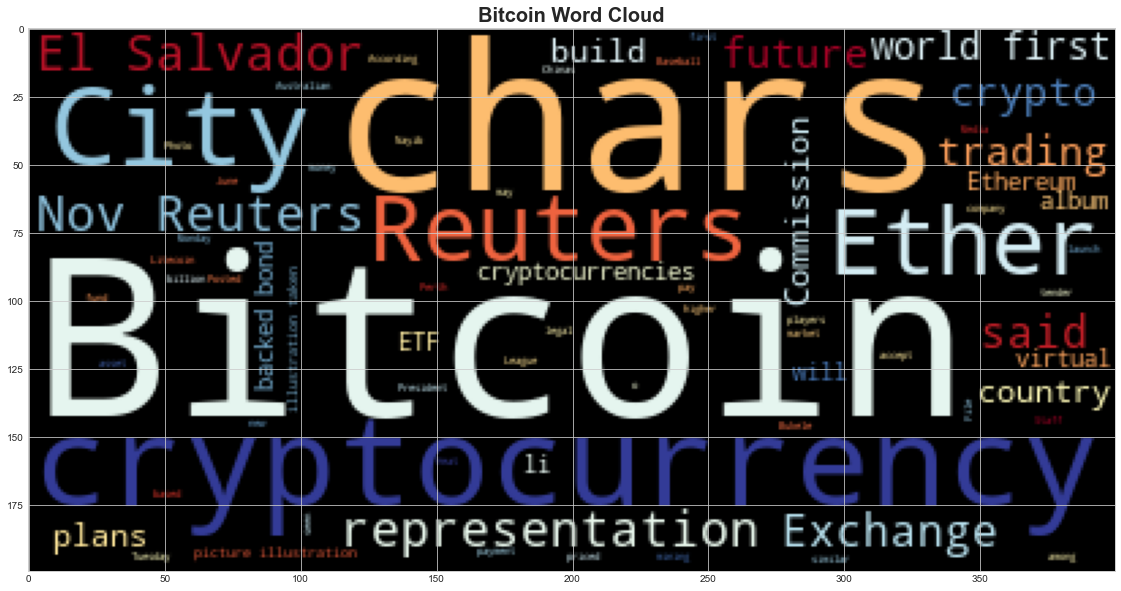

In [22]:
# Generate the Bitcoin word cloud
wc = WordCloud(colormap="RdYlBu").generate(btc_text)
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 20, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

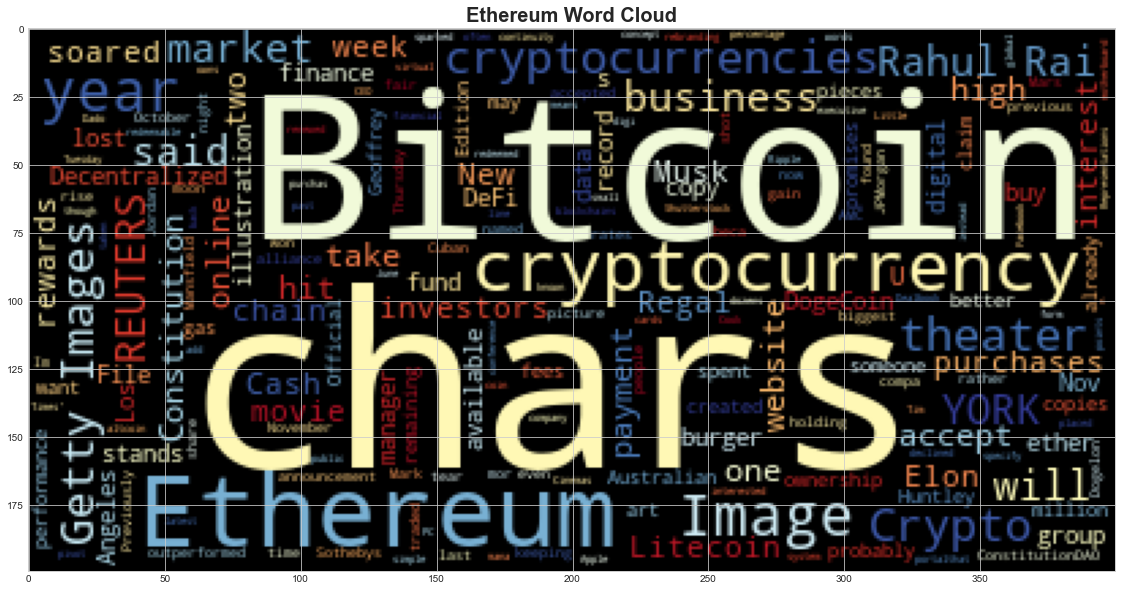

In [23]:
# Generate the Ethereum word cloud
wc = WordCloud(colormap="RdYlBu").generate(eth_text)
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 20, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [26]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_df.text)
btc_text

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars] MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world\'s first "Bitcoin City" with money from a $1 billion bitcoin-backed bond the country\'s President Nayib Bukele said o… [+3147 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Posted \r\nAfter becoming the first country to accept the cryptocurrency as legal tender, El Salvador plans to build the world\'s first Bitcoin City, funded initially by bitcoin-backed bonds. Bitcoin artwork displayed at the Bitcoin 2021 convention.\r\nMarco Bello/Getty Images\r\nThe Securities and Exchange Commission will not make a de

In [27]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [28]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [29]:
# List all Entities
for ent in btc_doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

earlier this year DATE
Verge LAW
Vox Media ORG
Photo Illustration ORG
Thiago Prudencio/S PERSON
El Salvador/ GPE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
AMC ORG
first ORDINAL
El Salvador GPE
Bitcoin City GPE
Bitcoin 2021 DATE
Marco Bello/ PERSON
The Securities and Exchange Commission ORG
Valkyrie PERSON
Spotify ORG
Adele PERSON
30 CARDINAL
+3186 ORG
NurPhoto ORG
ETF ORG
first ORDINAL
ETF ORG
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY
over 9% PERCENT
Australian Baseball League ORG
Perth Heat PERSON
first ORDINAL
Hea PERSON
68,000 MONEY
Ether ORG
5k MONEY
CoinGecko ORG
more than $3 trillion MONEY
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
May 20, 2021 DATE
REUTERS ORG
Dado Ruvic/File PhotoLONDON PERSON
Reuters ORG
60 MONEY
Tuesday DATE
Chinas National Development and Reform Commission ORG
Meng Wei PERSON
New York City GPE
Eric Adams PERSON
Reuters ORG
Reut

---

### Ethereum NER

In [30]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_df.text)
eth_text

'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars] More than $1.2 million has already been spent on gas fees\r\nOne of 13 remaining copies of the Official Edition of the Constitution.\r\nImage: Sothebys\r\nAs of last Thursday night, ConstitutionDAO found i… [+5262 chars] Ethereum has been on a tear this year. Its outperformed bitcoin this year and has hit an all-time high. Ethereum has even won over people like Mark Cuban.\r\nI have my fair share of bitcoin, but Im mor… [+10978 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Ethereum and bitcoin are the two biggest cryptocurrencies.\r\nJordan Mansfield /Getty Images\r\nCrypto investors shoul

In [31]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [32]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [33]:
# List all Entities
for ent in btc_doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

earlier this year DATE
Verge LAW
Vox Media ORG
Photo Illustration ORG
Thiago Prudencio/S PERSON
El Salvador/ GPE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
AMC ORG
first ORDINAL
El Salvador GPE
Bitcoin City GPE
Bitcoin 2021 DATE
Marco Bello/ PERSON
The Securities and Exchange Commission ORG
Valkyrie PERSON
Spotify ORG
Adele PERSON
30 CARDINAL
+3186 ORG
NurPhoto ORG
ETF ORG
first ORDINAL
ETF ORG
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY
over 9% PERCENT
Australian Baseball League ORG
Perth Heat PERSON
first ORDINAL
Hea PERSON
68,000 MONEY
Ether ORG
5k MONEY
CoinGecko ORG
more than $3 trillion MONEY
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
May 20, 2021 DATE
REUTERS ORG
Dado Ruvic/File PhotoLONDON PERSON
Reuters ORG
60 MONEY
Tuesday DATE
Chinas National Development and Reform Commission ORG
Meng Wei PERSON
New York City GPE
Eric Adams PERSON
Reuters ORG
Reut

---